# Code to generate Figure 5 time series analysis

In [5]:
import pandas as pd
import sys
import seaborn as sns
import scanpy as sc
import matplotlib.pylab as plt
sys.path.insert(0,"../helper_functions")
import gene_enrichment_helpers as gh
import plotting_helpers as ph
import bm_data_functions as bm
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [6]:
adata_all_epi=sc.read_h5ad("../../Data/processed_data/all_timepoints/adata_epithelial_no_doublets_FINAL.h5ad")

metadata = bm.get_bm_metadata()

epi_pseudobulk_time_varying_folder = "../../Results/tables/Epithelial_Celltype_Pseudobulk_Time_Varying_Genes/"

go_res_dir = "../../Results/plots/time_series_plots/"

In [7]:
genelist_references = gh.get_genelist_references()
all_top_hits = []

In [14]:

celltype="Secretory Lactocytes"

des_res_reduced=pd.read_csv(epi_pseudobulk_time_varying_folder+"secretory_lactocytes_filtered_time_differential_genes.csv",index_col=0)

up_sec_late = des_res_reduced[des_res_reduced["log2FoldChange"]>0].index
up_sec_early = des_res_reduced[des_res_reduced["log2FoldChange"]<0].index




In [15]:
celltype= "LC1"
res_res_reduced_lum=pd.read_csv(epi_pseudobulk_time_varying_folder+"LC1_filtered_time_differential_genes.csv",index_col=0)
up_lum_late = res_res_reduced_lum[res_res_reduced_lum["log2FoldChange"] > 0].index
up_lum_early = res_res_reduced_lum[res_res_reduced_lum["log2FoldChange"] < 0].index



In [16]:
up_late_both = set(up_lum_late).intersection(set(up_sec_late))
up_early_both = set(up_lum_early).intersection(set(up_sec_early))
opposites = set(up_lum_late).intersection(set(up_sec_early)).union(set(up_lum_early).intersection(set(up_sec_late)))

time_series_tables_dir = "../../Results/tables/SDataset_7_time_series/"

In [17]:
genes = list(up_late_both)
df=pd.DataFrame(index=genes, columns = ["LC1 log2foldchange", "Secretory log2foldchange","LC1 pcts","Secretory pcts"])
df["LC1 log2foldchange"] = res_res_reduced_lum.loc[genes,"log2FoldChange"]
df["Secretory log2foldchange"] = des_res_reduced.loc[genes,"log2FoldChange"]
df["LC1 pcts"] = res_res_reduced_lum.loc[genes,"pts"]
df["Secretory pcts"] = des_res_reduced.loc[genes,"pts"]
df.to_csv(time_series_tables_dir+"universal_late_up.csv")

genes = list(up_early_both)
df=pd.DataFrame(index=genes, columns = ["LC1 log2foldchange", "Secretory log2foldchange","LC1 pcts","Secretory pcts"])
df["LC1 log2foldchange"] = res_res_reduced_lum.loc[genes,"log2FoldChange"]
df["Secretory log2foldchange"] = des_res_reduced.loc[genes,"log2FoldChange"]
df["LC1 pcts"] = res_res_reduced_lum.loc[genes,"pts"]
df["Secretory pcts"] = des_res_reduced.loc[genes,"pts"]
df.to_csv(time_series_tables_dir+"universal_early_up.csv")

genes = list(opposites)
df=pd.DataFrame(index=genes, columns = ["LC1 log2foldchange", "Secretory log2foldchange","LC1 pcts","Secretory pcts"])
df["LC1 log2foldchange"] = res_res_reduced_lum.loc[genes,"log2FoldChange"]
df["Secretory log2foldchange"] = des_res_reduced.loc[genes,"log2FoldChange"]
df["LC1 pcts"] = res_res_reduced_lum.loc[genes,"pts"]
df["Secretory pcts"] = des_res_reduced.loc[genes,"pts"]
df.to_csv(time_series_tables_dir+"opposite_direction_genes.csv")

# Enrichr analysis

In [33]:
importlib.reload(gh)

<module 'gene_enrichment_helpers' from '../helper_functions/gene_enrichment_helpers.py'>

75


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


36


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


35


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


127


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


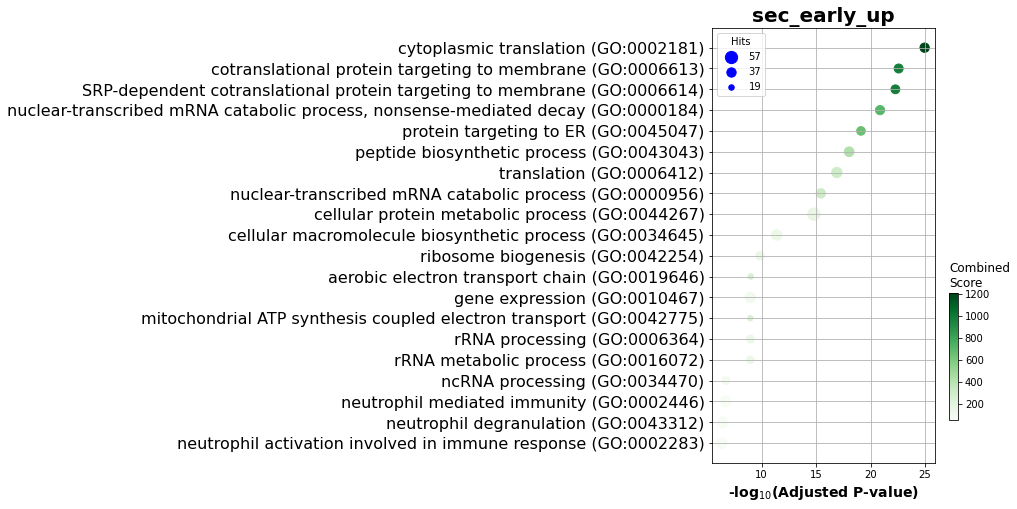

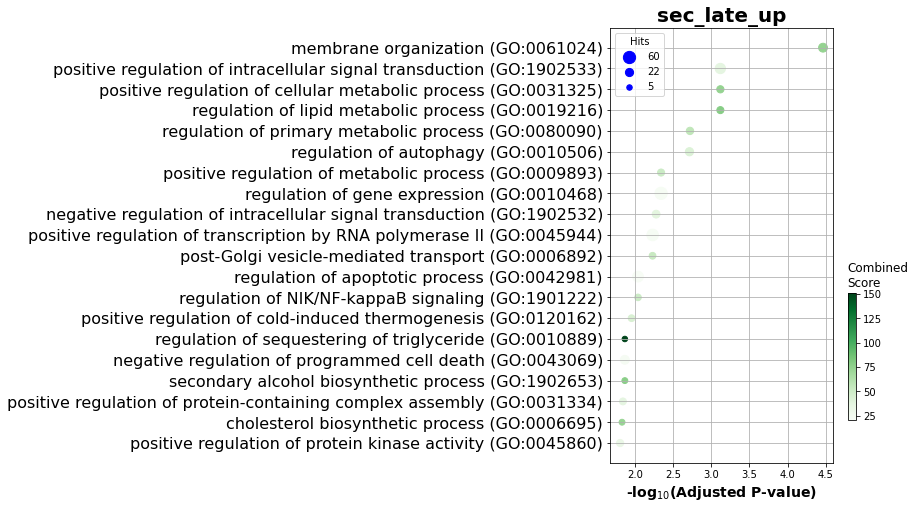

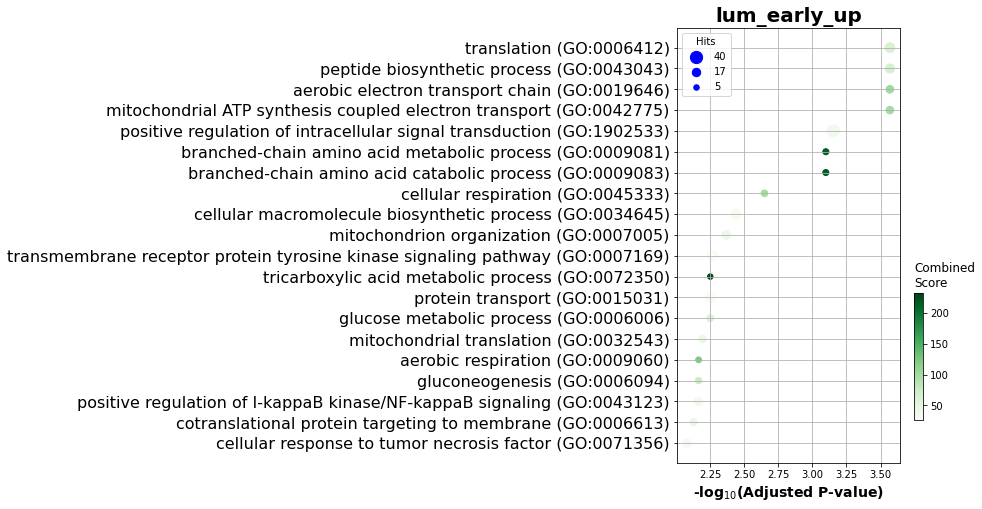

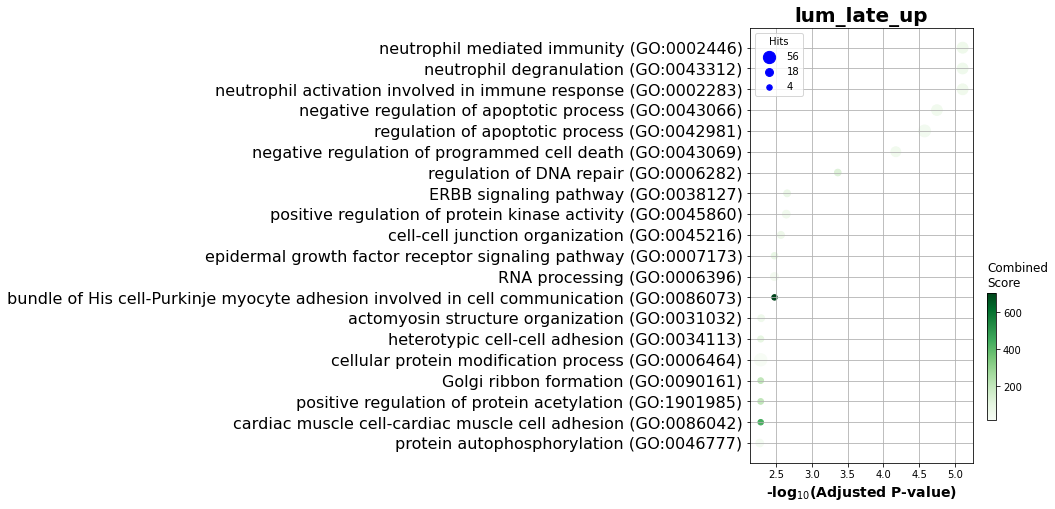

In [34]:
sec_early_enr,sec_early_up_go_collapsed,sec_early_increasing_list=gh.collapsed_enrichr_analysis(adata_all_epi, list(up_sec_early), "Secretory Lactocytes", "sec_early_up",genelist_references,metadata, corr_direction="down",go_res_dir =time_series_tables_dir)

sec_late_enr,sec_late_up_go_collapsed,sec_late_increasing_list=gh.collapsed_enrichr_analysis(adata_all_epi, list(up_sec_late), "Secretory Lactocytes", "sec_late_up",genelist_references,metadata, corr_direction="up",go_res_dir =time_series_tables_dir)

lum_early_enr,lum_early_up_go_collapsed,lum_early_up_increasing_list=gh.collapsed_enrichr_analysis(adata_all_epi, list(up_lum_early), "LC1",  "lum_early_up",genelist_references,metadata, corr_direction="down",go_res_dir =time_series_tables_dir)

lum_late_enr,lum_late_up_go_collapsed,lum_late_up_increasing_list=gh.collapsed_enrichr_analysis(adata_all_epi, list(up_lum_late), "LC1", "lum_late_up",genelist_references,metadata, corr_direction="up",go_res_dir =time_series_tables_dir)



In [37]:
sec_early_enr=sec_early_enr.res2d
sec_late_enr = sec_late_enr.res2d
lum_early_enr = lum_early_enr.res2d
lum_late_enr= lum_late_enr.res2d

In [41]:
sec_early_enr["passed_corr_threshold"] = False
sec_early_enr.loc[sec_early_enr["Term"].isin(sec_early_increasing_list),"passed_corr_threshold"]= True

sec_late_enr["passed_corr_threshold"] = False
sec_late_enr.loc[sec_late_enr["Term"].isin(sec_late_increasing_list),"passed_corr_threshold"]= True


lum_early_enr["passed_corr_threshold"] = False
lum_early_enr.loc[lum_early_enr["Term"].isin(lum_early_up_increasing_list),"passed_corr_threshold"]= True

lum_late_enr["passed_corr_threshold"] = False
lum_late_enr.loc[lum_late_enr["Term"].isin(lum_late_up_increasing_list),"passed_corr_threshold"]= True


In [42]:
sec_early_increasing_list = sec_early_enr[sec_early_enr["passed_corr_threshold"]]["Term"]
sec_late_increasing_list = sec_late_enr[sec_late_enr["passed_corr_threshold"]]["Term"]
lum_early_up_increasing_list = lum_early_enr[lum_early_enr["passed_corr_threshold"]]["Term"]
lum_late_up_increasing_list = lum_late_enr[lum_late_enr["passed_corr_threshold"]]["Term"]

# Finding overlaps of GO terms

In [43]:
combined_early_GO = list(set(sec_early_increasing_list).intersection(set(lum_early_up_increasing_list)))
combined_late_GO=list(set(sec_late_increasing_list).intersection(set(lum_late_up_increasing_list)))

In [44]:
just_sec_early_GO = list(set(sec_early_increasing_list)-set(combined_early_GO))
early_sec_overlap_info, collapsed_just_sec_early_list = gh.collapse_GO_hits(just_sec_early_GO,sec_early_enr)

just_lum_early_GO = list(set(lum_early_up_increasing_list)-set(combined_early_GO))
early_lum_overlap_info, collapsed_just_lum_early_list = gh.collapse_GO_hits(just_lum_early_GO,lum_early_enr)

just_sec_late_GO = list(set(sec_late_increasing_list)-set(combined_late_GO))
late_sec_overlap_info, collapsed_just_sec_late_list = gh.collapse_GO_hits(just_sec_late_GO,sec_late_enr)

just_lum_late_GO = list(set(lum_late_up_increasing_list)-set(combined_late_GO))

overlap_info, collapsed_just_lum_late_list = gh.collapse_GO_hits(just_lum_late_GO,lum_late_enr)


58
18
24
115


In [51]:
donor_colors = pd.read_csv("../helper_functions/donor_colors.csv")
donor_colors["num"]= donor_colors.index
donor_colors.index = donor_colors["donor"]
metadata["milk stage ordered"]= ""
for s in metadata.index:

    metadata.loc[s, "milk stage ordered"]=adata_all_epi.obs.loc[adata_all_epi.obs["sample"]==s,"milk stage ordered"].unique()[0]
milk_stage_colors = {i:donor_colors.loc[i,"color"] for i in metadata["milk stage ordered"].unique()}

In [54]:
col_colors

Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan],
             dtype='float64', name='sample')

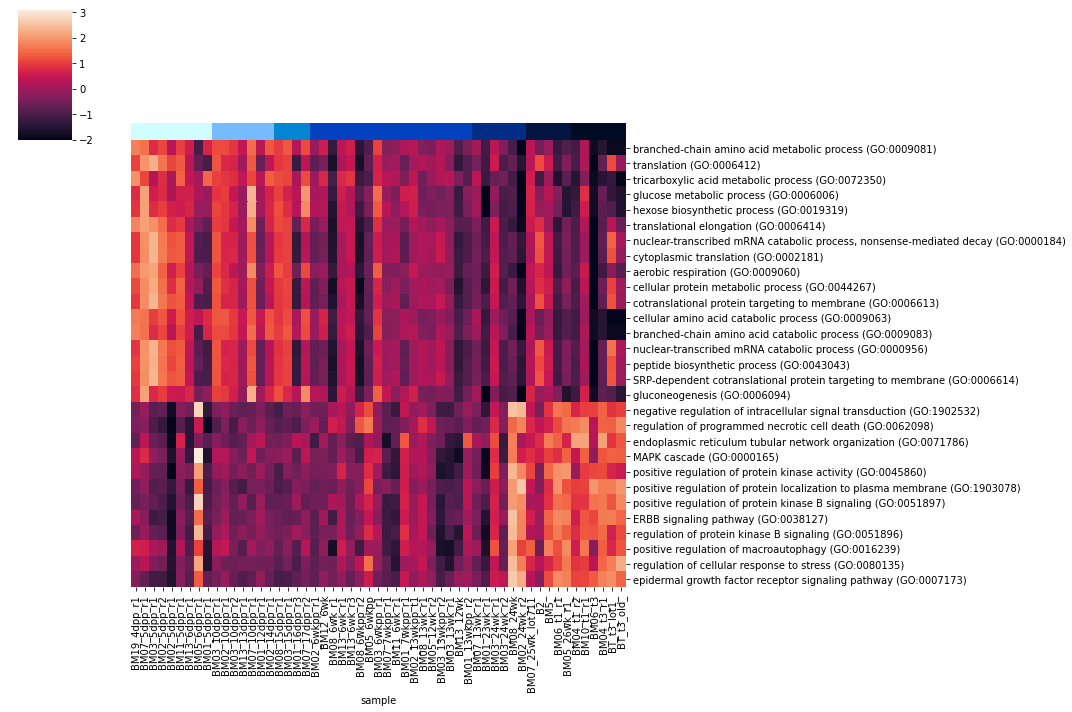

In [55]:
collapsed_scores_early_up = gh.get_mean_scores_for_heatmap(adata_all_epi,["Secretory Lactocytes","LC1"], combined_early_GO,metadata)
collapsed_scores_late_up = gh.get_mean_scores_for_heatmap(adata_all_epi,["Secretory Lactocytes","LC1"], combined_late_GO,metadata)    
combined_scores = pd.concat([collapsed_scores_early_up,collapsed_scores_late_up])
col_colors=combined_scores.columns.map(metadata[ "milk stage ordered"]).map(milk_stage_colors)
#row_colors = [epi_sub_colors["Secretory Lactocytes"]]*len(GO_hits_sec_late)
g=sns.clustermap( combined_scores[collapsed_scores_early_up.columns],row_cluster=False,col_cluster=False,col_colors=col_colors,z_score=0,figsize=(15,10),yticklabels=True,vmin=-2)
g.savefig(go_res_dir+"/shared_epi_enrichr_heatmap.pdf",bbox_inches="tight")


# Collapse and make exclusive heatmaps

In [57]:
top_collapsed_just_sec_early_list= sec_early_enr[sec_early_enr["Term"].isin(collapsed_just_sec_early_list)].sort_values("Odds Ratio",ascending=False)["Term"][:20].values
top_collapsed_just_sec_late_list= sec_late_enr[sec_late_enr["Term"].isin(collapsed_just_sec_late_list)].sort_values("Odds Ratio",ascending=False)["Term"][:20].values

In [58]:
epi_sub_colors={"Cycling Lactocytes": "#350F6C","KRT high lactocytes 1":"#D3C0EC", 
               "KRT high lactocytes 2": "#771856","LC1":'#9986A5', ##6E398F
                "MT High Secretory Lactocytes":"#8D0BDE","Secretory Lactocytes":'#bb99ff'} #"#C179ED""#C3AED1"


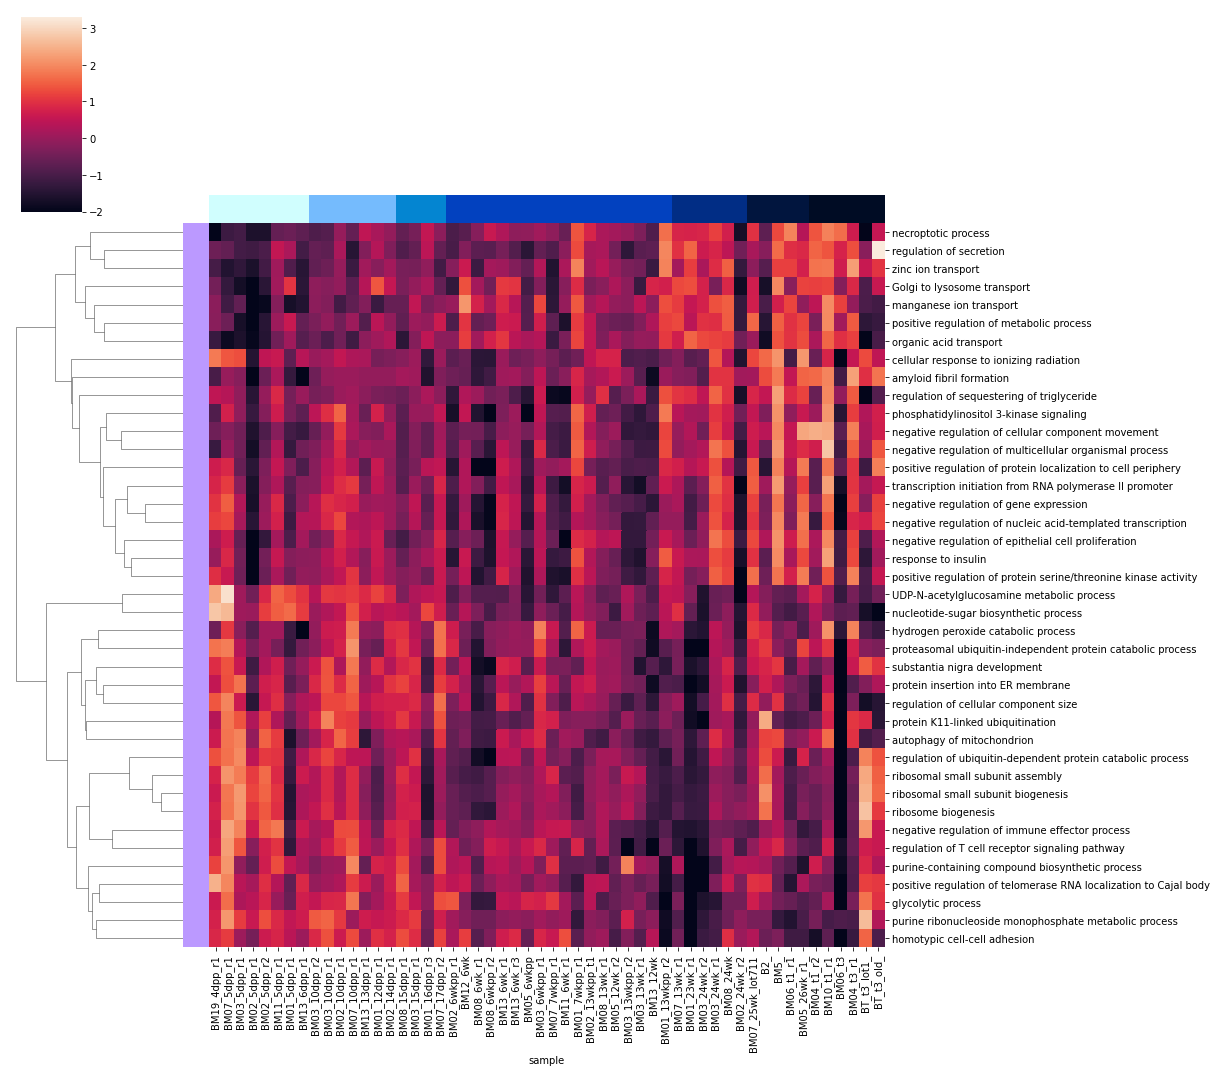

In [60]:
collapsed_scores_early_up = gh.get_mean_scores_for_heatmap(adata_all_epi,"Secretory Lactocytes", top_collapsed_just_sec_early_list,metadata)
collapsed_scores_late_up = gh.get_mean_scores_for_heatmap(adata_all_epi,"Secretory Lactocytes", top_collapsed_just_sec_late_list,metadata)    
combined_scores = pd.concat([collapsed_scores_early_up,collapsed_scores_late_up])
combined_scores.index = [i.split(" (GO")[0] for i in combined_scores.index]
col_colors=combined_scores.columns.map(metadata[ "milk stage ordered"]).map(milk_stage_colors)
row_colors = [epi_sub_colors["Secretory Lactocytes"]]*len(collapsed_scores_early_up+collapsed_scores_late_up)
g=sns.clustermap( combined_scores[collapsed_scores_early_up.columns],row_cluster=True,col_cluster=False,col_colors=col_colors,row_colors=row_colors,z_score=0,figsize=(17,15),yticklabels=True,vmin=-2)
g.savefig(go_res_dir+"/sec_lactocyte_enrichr_heatmap_top_collapsed.pdf",bbox_inches="tight")


In [63]:
geneset_metadata= gh.make_GO_term_metadata(adata_all_epi, group_column = "Epithelial Cell Subclusters")

genelist_references = gh.get_genelist_references()
geneset_metadata=geneset_metadata.loc[set(geneset_metadata.index).intersection(set(genelist_references["GO_Biological_Process_2021"].keys()))]
parents_and_children = gh.build_parents_and_children_dict(geneset_metadata, genelist_references)

just_lum_late_collapsed = gh.collapse_by_parents(parents_and_children, geneset_metadata, collapsed_just_lum_late_list)

In [64]:
top_collapsed_just_lum_early_list= lum_early_enr[lum_early_enr["Term"].isin(collapsed_just_lum_early_list)].sort_values("Odds Ratio",ascending=False)["Term"][:20].values
top_collapsed_just_lum_late_list= lum_late_enr[lum_late_enr["Term"].isin(list(just_lum_late_collapsed))].sort_values("Odds Ratio",ascending=False)["Term"][:20].values

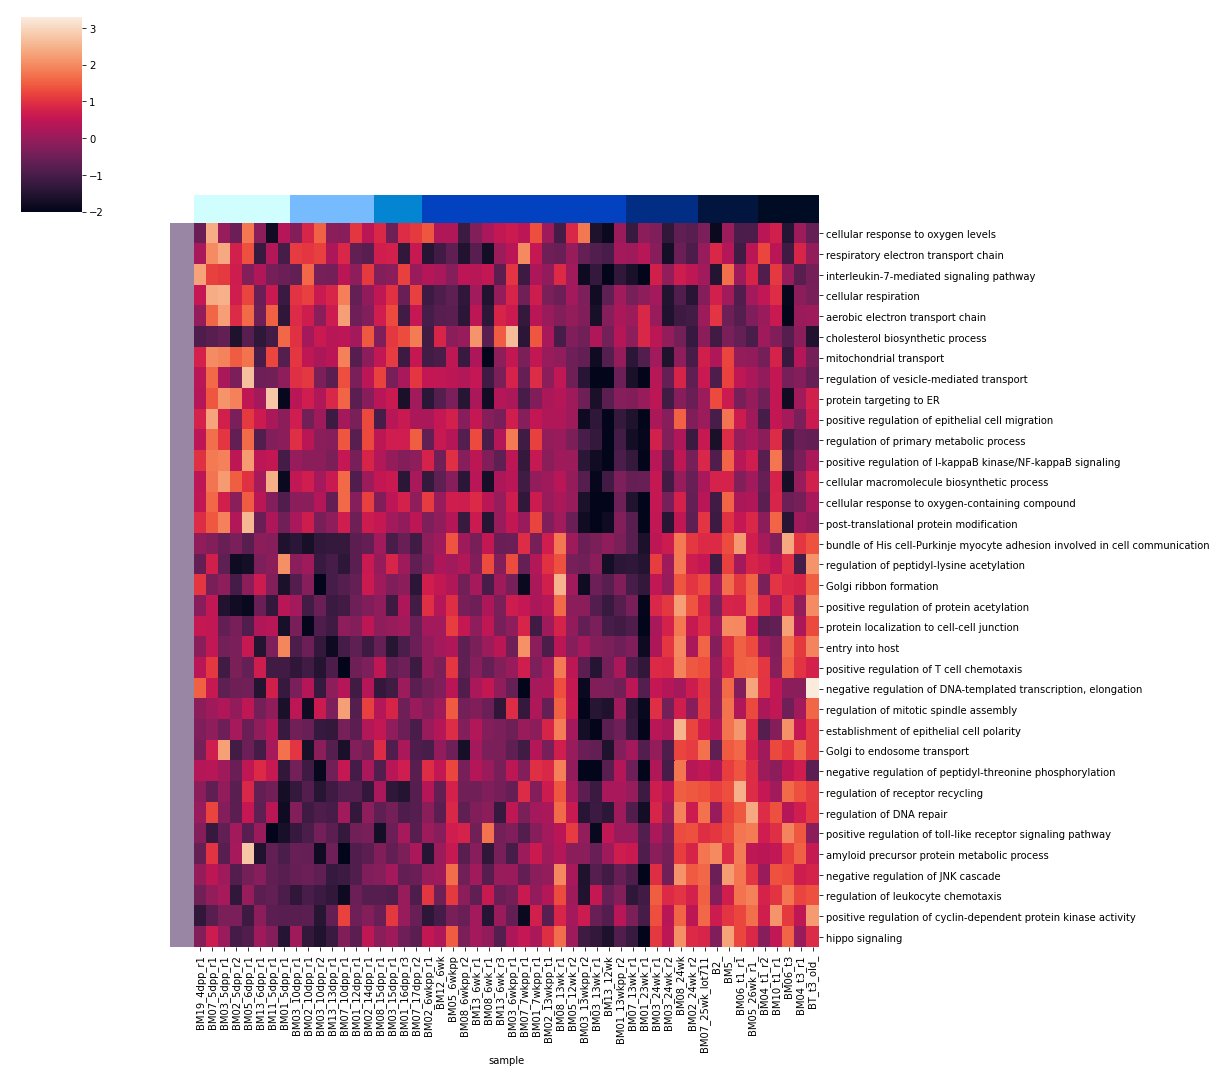

In [66]:
collapsed_scores_early_up = gh.get_mean_scores_for_heatmap(adata_all_epi,"LC1", top_collapsed_just_lum_early_list,metadata)
collapsed_scores_late_up = gh.get_mean_scores_for_heatmap(adata_all_epi,"LC1", list(top_collapsed_just_lum_late_list),metadata)    
combined_scores = pd.concat([collapsed_scores_early_up,collapsed_scores_late_up])
combined_scores.index = [i.split(" (GO")[0] for i in combined_scores.index]
col_colors=combined_scores.columns.map(metadata[ "milk stage ordered"]).map(milk_stage_colors)
row_colors = [epi_sub_colors["LC1"]]*len(collapsed_scores_early_up+collapsed_scores_late_up)
g=sns.clustermap( combined_scores[collapsed_scores_early_up.columns],row_cluster=False,col_cluster=False,col_colors=col_colors,row_colors=row_colors,z_score=0,figsize=(17,15),yticklabels=True,vmin=-2)
g.savefig(go_res_dir+"/lum_lactocyte_enrichr_heatmap_collapsed.pdf",bbox_inches="tight")


/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'tmp_celltype' as categorical


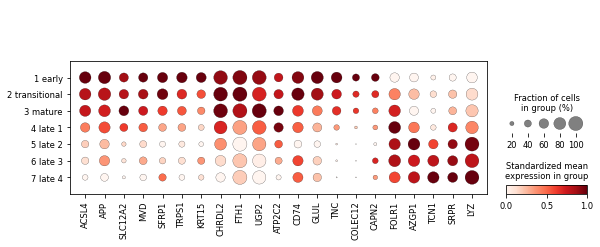

In [67]:
sc.pl.dotplot(adata_all_epi,["ACSL4","APP","SLC12A2","MVD","SFRP1","TRPS1","KRT15","CHRDL2","FTH1","UGP2","ATP2C2","CD74","GLUL","TNC","COLEC12","CAPN2","FOLR1","AZGP1","TCN1","SRPR","LYZ"],groupby="milk stage ordered",standard_scale="var",colorbar_title='Standardized mean\nexpression in group',show=False)
plt.savefig(go_res_dir+"select_genes_over_all_subclusts.pdf",bbox_inches="tight")


In [68]:
milk=["ACACB","GPRC5B","CIDEA","CREB3L1","APRT","SREBF1","CITED2","EPCAM","LGALS3"]
hormone_receptor = ["ESR1","PRLR","INSR"]
growth_factor = ["EGF","EGFR","TGFA","HBEGF","EPS15","SOX9","ARHGEF7","PIGR"]
stat5=["STAT5A","STAT5B","ACACA","PPIA","AKT1"]
ap1=["MAPK3","MAPK1","FOS","JUN","ATF3","JUNB","ZFP36"]


In [70]:
lum_sec_epi=adata_all_epi[adata_all_epi.obs["Epithelial Cell Subclusters"].isin(["LC1","Secretory Lactocytes"])]

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [73]:
importlib.reload(ph)

<module 'plotting_helpers' from '../helper_functions/plotting_helpers.py'>

Index(['sample', 'include_for_analysis', 'time_post_partum_days',
       'time_post_partum_weeks', 'milk_stage', 'donor', 'infant_sick_YN',
       'weaning_YN', 'mastisis_YN', 'breast_soreness_YN',
       ...
       'APRT', 'APRT on', 'SREBF1', 'SREBF1 on', 'CITED2', 'CITED2 on',
       'EPCAM', 'EPCAM on', 'LGALS3', 'LGALS3 on'],
      dtype='object', length=424)


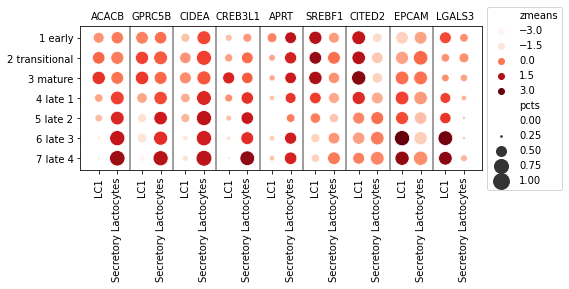

In [74]:
x_condition = "Epithelial Cell Subclusters"
y_condition = "milk stage ordered"

ordered_y_condition = ['1 early', '2 transitional', '3 mature', '4 late 1', '5 late 2', '6 late 3', '7 late 4']
ordered_y_condition.reverse()
ph.grouped_dotplot(x_condition,y_condition,milk,lum_sec_epi,ordered_y_condition=ordered_y_condition)
plt.savefig(go_res_dir+"condition_split_dotplot_opposites_milkgenes.pdf",bbox_inches="tight")

Index(['sample', 'include_for_analysis', 'time_post_partum_days',
       'time_post_partum_weeks', 'milk_stage', 'donor', 'infant_sick_YN',
       'weaning_YN', 'mastisis_YN', 'breast_soreness_YN',
       ...
       'EPCAM', 'EPCAM on', 'LGALS3', 'LGALS3 on', 'ESR1', 'ESR1 on', 'PRLR',
       'PRLR on', 'INSR', 'INSR on'],
      dtype='object', length=430)


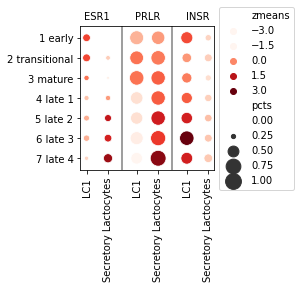

In [75]:
ph.grouped_dotplot(x_condition,y_condition,hormone_receptor,lum_sec_epi,ordered_y_condition=ordered_y_condition)
plt.savefig(go_res_dir+"condition_split_dotplot_opposites_hormone_receptors.pdf",bbox_inches="tight")

Index(['sample', 'include_for_analysis', 'time_post_partum_days',
       'time_post_partum_weeks', 'milk_stage', 'donor', 'infant_sick_YN',
       'weaning_YN', 'mastisis_YN', 'breast_soreness_YN',
       ...
       'HBEGF', 'HBEGF on', 'EPS15', 'EPS15 on', 'SOX9', 'SOX9 on', 'ARHGEF7',
       'ARHGEF7 on', 'PIGR', 'PIGR on'],
      dtype='object', length=446)


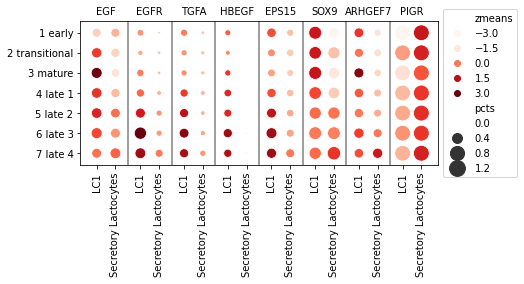

In [76]:
ph.grouped_dotplot(x_condition,y_condition,growth_factor,lum_sec_epi,ordered_y_condition=ordered_y_condition)
plt.savefig(go_res_dir+"condition_split_dotplot_opposites_growth_factors.pdf",bbox_inches="tight")

Index(['sample', 'include_for_analysis', 'time_post_partum_days',
       'time_post_partum_weeks', 'milk_stage', 'donor', 'infant_sick_YN',
       'weaning_YN', 'mastisis_YN', 'breast_soreness_YN',
       ...
       'STAT5A', 'STAT5A on', 'STAT5B', 'STAT5B on', 'ACACA', 'ACACA on',
       'PPIA', 'PPIA on', 'AKT1', 'AKT1 on'],
      dtype='object', length=456)


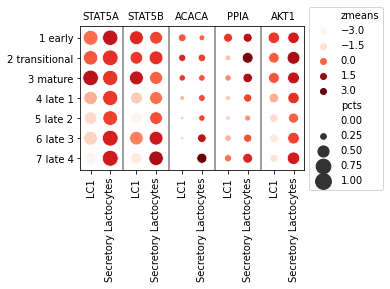

In [77]:
ph.grouped_dotplot(x_condition,y_condition,stat5,lum_sec_epi,ordered_y_condition=ordered_y_condition)
plt.savefig(go_res_dir+"condition_split_dotplot_opposites_stat5.pdf",bbox_inches="tight")

Index(['sample', 'include_for_analysis', 'time_post_partum_days',
       'time_post_partum_weeks', 'milk_stage', 'donor', 'infant_sick_YN',
       'weaning_YN', 'mastisis_YN', 'breast_soreness_YN',
       ...
       'FOS', 'FOS on', 'JUN', 'JUN on', 'ATF3', 'ATF3 on', 'JUNB', 'JUNB on',
       'ZFP36', 'ZFP36 on'],
      dtype='object', length=470)


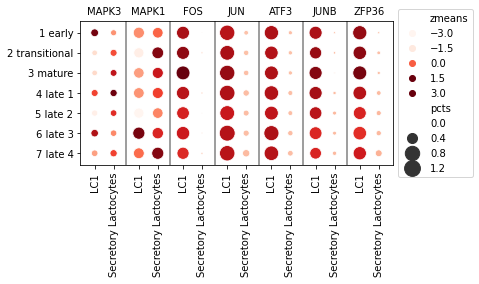

In [78]:
ph.grouped_dotplot(x_condition,y_condition,ap1,lum_sec_epi,ordered_y_condition=ordered_y_condition)
plt.savefig(go_res_dir+"condition_split_dotplot_opposites_ap1.pdf",bbox_inches="tight")